# Markov Chain Exercise

### MSDS 460 - Module 9 Discussion Post

#### Steve Desilets

#### August 20, 2023

### Question

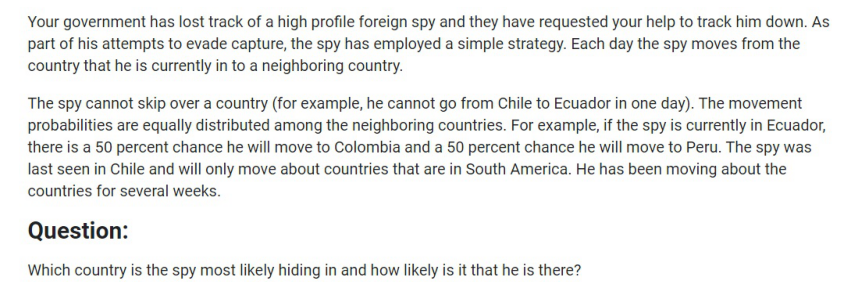

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Discussion_9_Problem_Image.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

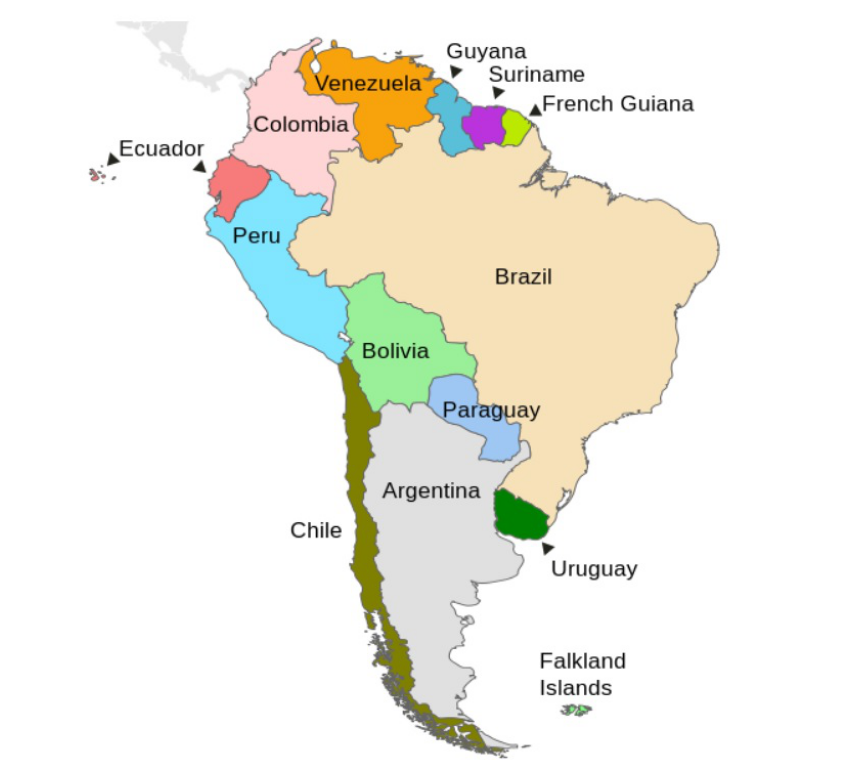

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Discussion_9_Problem_Image_2.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

### Answer

Let's solve this problem analytically by generating Markov simulations of the spy's movements, which we can leverage to calculate the probability of the spy being in each country.

In [11]:
import random

# Define a transition matrix for the Markov chain
transition_matrix = {
    'Paraguay': {'Argentina': 1/3, 'Bolivia': 1/3, 'Brazil': 1/3 },
    'Bolivia': {'Argentina': 0.2, 'Chile': 0.2, 'Peru': 0.2 , 'Brazil': 0.2, 'Paraguay': 0.2 },
    'Peru': {'Ecuador': 0.2, 'Colombia': 0.2, 'Brazil': 0.2 , 'Bolivia': 0.2, 'Chile': 0.2 },
    'Ecuador': {'Peru': 0.5, 'Colombia': 0.5 },
    'Colombia': {'Ecuador': 0.25, 'Peru': 0.25, 'Brazil': 0.25 , 'Venezuela': 0.25 },
    'Venezuela': {'Colombia': 1/3, 'Brazil': 1/3, 'Guyana': 1/3 },
    'Guyana': {'Venezuela': 1/3, 'Brazil': 1/3, 'Suriname': 1/3 },
    'Suriname': {'Guyana': 1/3, 'Brazil': 1/3, 'French Guiana': 1/3 },
    'French Guiana': {'Suriname': 0.5, 'Brazil': 0.5 },
    'Brazil': {'Uruguay': 0.1, 'Argentina': 0.1, 'Paraguay': 0.1 , 'Bolivia': 0.1, 'Peru': 0.1, 'Colombia': 0.1, 'Venezuela': 0.1, 'Guyana': 0.1, 'Suriname': 0.1, 'French Guiana': 0.1 },
    'Uruguay': {'Argentina': 0.5, 'Brazil': 0.5},
    'Argentina': {'Chile': 0.2, 'Bolivia': 0.2, 'Paraguay': 0.2 , 'Brazil': 0.2, 'Uruguay': 0.2  },
    'Chile': {'Peru': 1/3, 'Bolivia': 1/3 , 'Argentina': 1/3 }, 
    'Falkland Islands': {'Falkland Islands': 1},     
}

# Define starting probabilities for each country
starting_probabilities = {'Paraguay': 0,
                          'Bolivia': 0, 
                          'Peru': 0,
                          'Ecuador': 0,
                          'Colombia': 0,
                          'Venezuela': 0, 
                          'Guyana': 0,
                          'Suriname': 0,
                          'French Guiana': 0,
                          'Brazil': 0,
                          'Uruguay': 0,
                          'Argentina': 0,
                          'Chile': 1,
                          'Falkland Islands': 0}

# Choose the starting country randomly based on the starting probabilities
current_state = random.choices(
    population=list(starting_probabilities.keys()),
    weights=list(starting_probabilities.values())
)[0]

# Generate a sequence of countries using the transition matrix
num_iterations = 1000000
movements_list = []
for i in range(num_iterations):
#    print(current_state)
    next_state = random.choices(
        population=list(transition_matrix[current_state].keys()),
        weights=list(transition_matrix[current_state].values())
    )[0]
    current_state = next_state
    movements_list.append(current_state)
    
countries_list = list(starting_probabilities.keys())
    
for j in countries_list:
    percent_chance_for_country = round(100 * (movements_list.count(j) / num_iterations), 2)
    print(f"There is a {percent_chance_for_country}% chance that the spy is in {j}.")

There is a 5.98% chance that the spy is in Paraguay.
There is a 10.03% chance that the spy is in Bolivia.
There is a 10.04% chance that the spy is in Peru.
There is a 4.0% chance that the spy is in Ecuador.
There is a 8.01% chance that the spy is in Colombia.
There is a 6.02% chance that the spy is in Venezuela.
There is a 6.01% chance that the spy is in Guyana.
There is a 5.99% chance that the spy is in Suriname.
There is a 4.0% chance that the spy is in French Guiana.
There is a 19.96% chance that the spy is in Brazil.
There is a 3.95% chance that the spy is in Uruguay.
There is a 9.97% chance that the spy is in Argentina.
There is a 6.02% chance that the spy is in Chile.
There is a 0.0% chance that the spy is in Falkland Islands.


From the output above, we can see that the spy is most likely to be in Brazil. The chance of the spy being in Brazil is approximately 19.96%.